C:\Users\jazil\AppData\Local\Temp\ipykernel_9020\3716565015.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


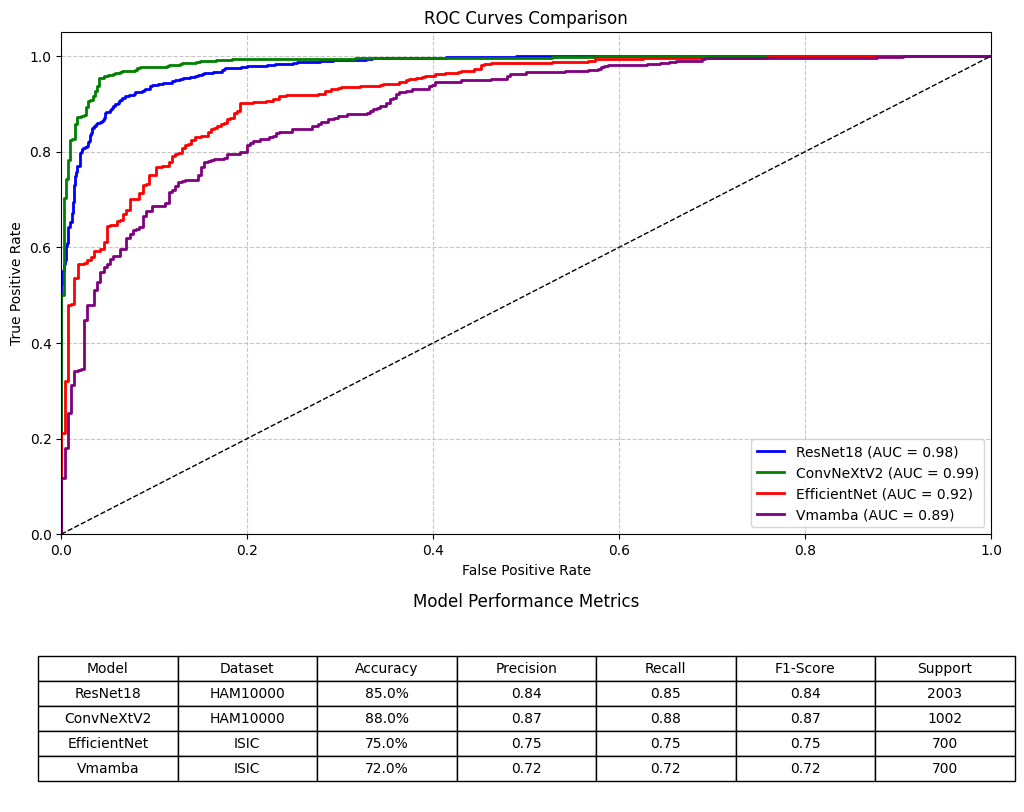

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(42)

# =============================================
# 1. Define Models and Their Reported Metrics
# =============================================
models = {
    "ResNet18": {
        "Dataset": "HAM10000",
        "Accuracy": 0.85,
        "Precision": 0.84,
        "Recall": 0.85,
        "F1-Score": 0.84,
        "Support": 2003,
    },
    "ConvNeXtV2": {
        "Dataset": "HAM10000",
        "Accuracy": 0.88,
        "Precision": 0.87,
        "Recall": 0.88,
        "F1-Score": 0.87,
        "Support": 1002,
    },
    "EfficientNet": {
        "Dataset": "ISIC",
        "Accuracy": 0.75,
        "Precision": 0.75,
        "Recall": 0.75,
        "F1-Score": 0.75,
        "Support": 700,
    },
    "Vmamba": {
        "Dataset": "ISIC",
        "Accuracy": 0.72,
        "Precision": 0.72,
        "Recall": 0.72,
        "F1-Score": 0.72,
        "Support": 700,
    }
}

# =============================================
# 2. Generate Synthetic ROC Data for Each Model
# =============================================
plt.figure(figsize=(12, 10))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)
ax1 = plt.subplot(gs[0])  # For ROC curves
ax2 = plt.subplot(gs[1])  # For table
ax2.axis('off')

colors = ['blue', 'green', 'red', 'purple']

for i, (model_name, metrics) in enumerate(models.items()):
    n_samples = metrics["Support"]
    accuracy = metrics["Accuracy"]
    
    # Generate true labels (60% positive class)
    y_true = np.random.choice([0, 1], size=n_samples, p=[0.4, 0.6])
    
    # Generate predicted probabilities based on model accuracy
    center_pos = 0.5 + (accuracy - 0.5) * 0.8  # Higher accuracy -> predictions closer to 1 for positives
    center_neg = 0.5 - (accuracy - 0.5) * 0.8  # Higher accuracy -> predictions closer to 0 for negatives
    
    y_score = np.zeros(n_samples)
    y_score[y_true == 1] = np.random.normal(loc=center_pos, scale=0.2, size=np.sum(y_true))
    y_score[y_true == 0] = np.random.normal(loc=center_neg, scale=0.2, size=n_samples - np.sum(y_true))
    y_score = np.clip(y_score, 0, 1)  # Ensure probabilities are between 0 and 1
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    ax1.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{model_name} (AUC = {roc_auc:.2f})')

# =============================================
# 3. Format ROC Plot
# =============================================
ax1.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal reference line
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves Comparison')
ax1.legend(loc="lower right")
ax1.grid(True, linestyle='--', alpha=0.7)

# =============================================
# 4. Create Performance Table
# =============================================
table_data = [
    ["Model", "Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "Support"],
    ["ResNet18", "HAM10000", "85.0%", "0.84", "0.85", "0.84", "2003"],
    ["ConvNeXtV2", "HAM10000", "88.0%", "0.87", "0.88", "0.87", "1002"],
    ["EfficientNet", "ISIC", "75.0%", "0.75", "0.75", "0.75", "700"],
    ["Vmamba", "ISIC", "72.0%", "0.72", "0.72", "0.72", "700"]
]

# Add table to plot
table = ax2.table(cellText=table_data,
                  loc='center',
                  cellLoc='center',
                  colWidths=[0.15]*7)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
ax2.set_title('Model Performance Metrics', fontsize=12, pad=20)

# =============================================
# 5. Save and Show Plot
# =============================================
plt.tight_layout()
plt.savefig('model_comparison_roc_table.png', dpi=300, bbox_inches='tight')
plt.show()